Dans ce notebook nous explorons les différents types particuliers d'homographies. Les homographies jouent un rôle important en vision comme illustré dans le fichier Homography-between-similar-pictures.pdf où je montre que sous certaines hypothèses, deux images similaires sont toujours reliées par une homographie (qui correspond en fait à une relation linéaire dans les coordonnées homogènes). Dans ce document .pdf je donne aussi une interprétation visuelle de ce que sont les coordonnées homogènes.

Les notions de coordonnées homogènes et d'homographie ne sont pas du tout anodines. Elles sont largement utilisées dans des livres de référence en computer vision comme "Algorithms and Applications" de Richard Szeliski (https://szeliski.org/Book/)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original square points
square = np.array([
    [0, 0, 1],  # (0, 0)
    [1, 0, 1],  # (1, 0)
    [1, 1, 1],  # (1, 1)
    [0, 1, 1]   # (0, 1)
]).T

Passage des coordonnées inhomogènes à homogènes:

$
\begin{pmatrix}
x \\
y
\end{pmatrix}
\rightarrow
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$

Passage des coordonnées homogènes à inhomogènes:

$
\begin{pmatrix}
x \\
y \\
\lambda
\end{pmatrix}
\rightarrow
\begin{pmatrix}
x/\lambda \\
y/\lambda
\end{pmatrix}
$

In [ ]:
def plottransfo(initial,final):
  # Plot the original square and translated square
  plt.figure(figsize=(6, 6))
  plt.grid(True)

  # remise sous forme inhomogène
  for l in range(3):
    for k in range(4):
      initial[l,k]=initial[l,k]/initial[2,k]
      final[l,k]=final[l,k]/final[2,k]


  plt.plot([initial[0, 0], initial[0, 1], initial[0, 2], initial[0, 3], initial[0, 0]],
          [initial[1, 0], initial[1, 1], initial[1, 2], initial[1, 3], initial[1, 0]],
          'b-o', label='Original Square')
  plt.plot([final[0, 0], final[0, 1], final[0, 2], final[0, 3], final[0, 0]],
          [final[1, 0], final[1, 1], final[1, 2], final[1, 3], final[1, 0]],
          'r-o', label='Transformed Square')

  plt.xlim(-1, 5)
  plt.ylim(-1, 5)
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title(f'Transformation of the square')
  plt.legend()
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

## Translation

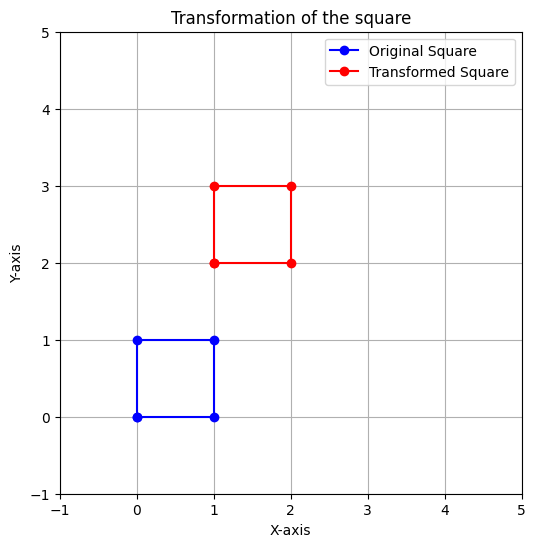

In [ ]:
# Translation d'1 unité d'abscisse et 2 unités d'ordonnée
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])

translated_square = translation_matrix @ square

plottransfo(square,translated_square)


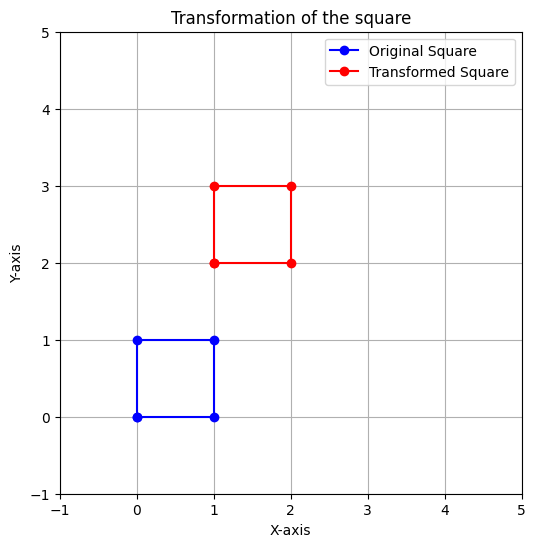

In [ ]:
# une autre matrice effectue la même translation !
translation_matrix = np.array([
    [2, 0, 2],
    [0, 2, 4],
    [0, 0, 2]
])

translated_square = translation_matrix @ square

plottransfo(square,translated_square)

La translation de $x$ unités d'abscisse et $y$ unités d'ordonnée s'écrit donc de plusieurs façons en coordonnées homogènes:

$
T_u(x,y)=\begin{pmatrix}
u & 0 & ux \\
0 & u & uy \\
0 & 0 & u
\end{pmatrix}
$ avec $u \neq 0$.

Les matrices $
T_1(x,y)=\begin{pmatrix}
1 & 0 & x \\
0 & 1 & y \\
0 & 0 & 1
\end{pmatrix}
$ et $T_2(x,y)=
\begin{pmatrix}
2 & 0 & 2x \\
0 & 2 & 2y \\
0 & 0 & 2
\end{pmatrix}
$ ne sont que deux écritures possibles parmi une infinité d'autres pour décrire cette translation.

## Rotation

Pour rappel, les rotations sont décrites par les éléments de $SO_{2}(\mathbb{R})$, le groupe spécial orthogonal d'ordre $2$. En particulier, la rotation d'angle $\theta$ est associée à la matrice $
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}
$.

En coordonnées homogènes, cela donne:

$
\begin{pmatrix}
u\cos\theta & -u\sin\theta & 0 \\
u\sin\theta & u\cos\theta & 0 \\
0 & 0 & u
\end{pmatrix}
$ avec $u \neq 0$.

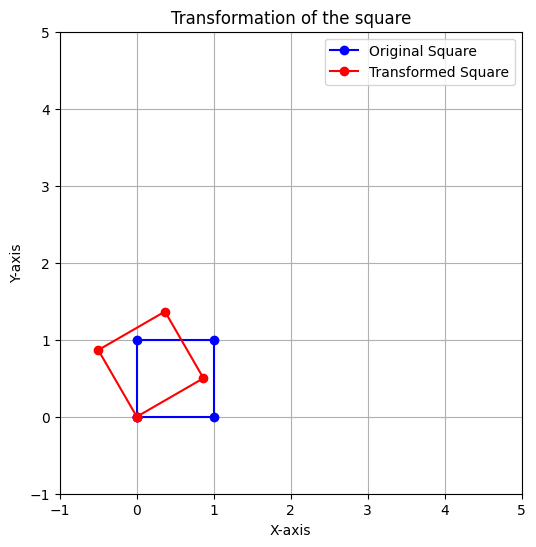

In [ ]:
rotation_matrix = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6), 0],
    [np.sin(np.pi/6), np.cos(np.pi/6), 0],
    [0, 0, 1]
])

rotated_square = rotation_matrix @ square

plottransfo(square,rotated_square)

## Transformation euclidienne (ou transformation "rigide") = composées de rotations et de translations

### La rotation et la translation ne commutent pas

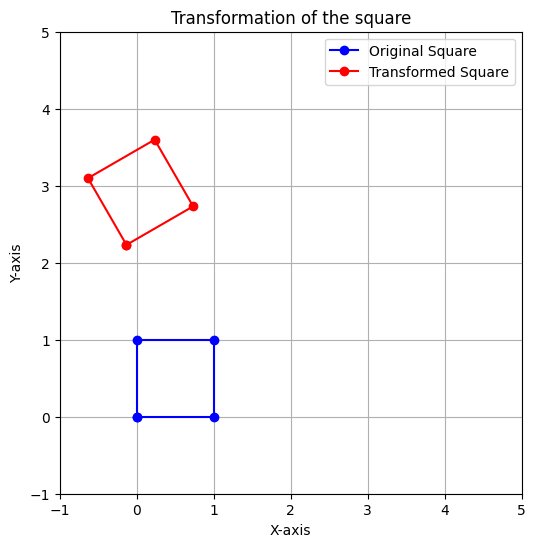

In [ ]:
rotation_matrix = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6), 0],
    [np.sin(np.pi/6), np.cos(np.pi/6), 0],
    [0, 0, 1]
])
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])

rotated_square = rotation_matrix @ translation_matrix @ square  # on translate d'abord d'1 unité en abscisse et 2 unités en ordonnée, puis on fait une rotation centrée en 0 d'angle pi/6

plottransfo(square,rotated_square)

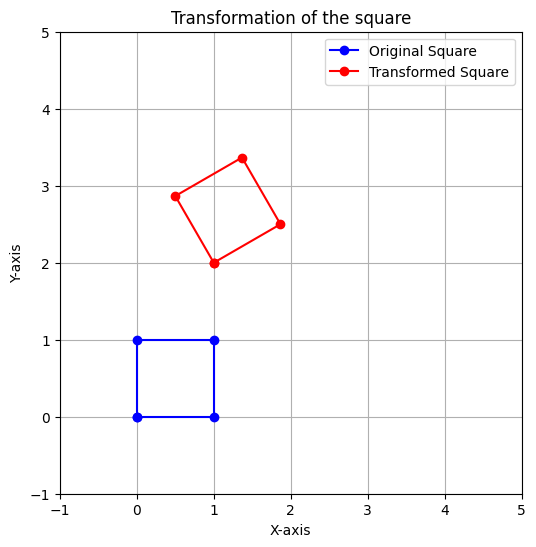

In [ ]:
rotation_matrix = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6), 0],
    [np.sin(np.pi/6), np.cos(np.pi/6), 0],
    [0, 0, 1]
])
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])

rotated_square =  translation_matrix @ rotation_matrix @ square  # d'abord on fait une rotation d'angle pi/6 et de centre 0, puis on translate d'1 unité d'abscisse et 2 unités d'ordonnée

plottransfo(square,rotated_square)

**ATTENTION: la rotation et la translation ne commutent pas (voir ci-dessus)**

In [4]:
from sympy import Matrix, symbols, simplify, cos, sin
u_1, u_2, theta, x_1, y_1 = symbols('u_1 u_2 theta x_1 y_1')
rotation = Matrix([[u_1*cos(theta), -u_1*sin(theta), 0],
            [u_1*sin(theta), u_1*cos(theta), 0],
            [0, 0, u_1]])
translation = Matrix([[u_2, 0, u_2*x_1],
            [0, u_2, u_2*y_1],
            [0, 0, u_2]])
expression1 = rotation * translation
expression2 = translation * rotation

RT = simplify(expression1)   # translation puis rotation
TR = simplify(expression2)   # rotation puis translation

In [5]:
RT # translation puis rotation

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), u_1*u_2*(x_1*cos(theta) - y_1*sin(theta))],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), u_1*u_2*(x_1*sin(theta) + y_1*cos(theta))],
[                 0,                   0,                                   u_1*u_2]])

In [6]:
TR # rotation puis translation

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), u_1*u_2*x_1],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), u_1*u_2*y_1],
[                 0,                   0,     u_1*u_2]])

Avec ces calculs formels, on voit encore plus clairement que la rotation et la translation ne commutent pas.

### Forme mathématique générale pour les transformations euclidiennes

Nous voulons établir que les transformations euclidiennes sont décrites par l'ensemble
$$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u \in \mathbb{R}, u \neq 0
\right\}$$

Nous partons de la définition que les transformations euclidiennes sont toutes les composées possibles de translations et de rotations.

Par exemple, en considérant des réels quelconques $\theta_1, \theta_2,x_1,x_2, y_1,y_2$, sont des transformations euclidiennes:

* $T(x_1,y_1)$
* $R(\theta_1)$
* $R(\theta_1)T(x_1,y_1)$
* $T(x_1,y_1)R(\theta_1)$
* $T(x_2,y_2)R(\theta_1)T(x_1,y_1)$
* $R(\theta_2)T(x_1,y_1)R(\theta_1)$
* $R(\theta_2)T(x_2,y_2)R(\theta_1)T(x_1,y_1)$
* $T(x_2,y_2)R(\theta_2)T(x_1,y_1)R(\theta_1)$
* N'importe quel produit aussi long qu'on veut de matrices de translation et de matrices de rotations


Remarque: dans la liste ci-dessus, on n'évoque que les produits alternés de rotations et de translations, car il est clair que le produit de deux rotations est une rotation et que le produit de deux translations est une translation, ce qui nous ramène immédiatement aux cas des produits alternés: **les produits alternés de translations et de rotations décrivent toutes les transformations euclidiennes**.

Montrer que les transformations euclidiennes sont décrites par l'ensemble
$$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u \in \mathbb{R}, u \neq 0
\right\}$$
revient à montrer que
$$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u\in \mathbb{R}, u \neq 0
\right\}={\text{Ensemble des produits alternés de rotations et de translations}}$$

Pour montrer cette égalité ensembliste, raisonnons par double inclusion.

#### Inclusion $\subset$

Soient $u, \theta$, $t_x$, $t_y$ $\in$ $\mathbb{R}$ tels que $u \neq 0$

In [7]:
from sympy import Matrix, symbols, simplify, cos, sin
u, v, theta, t_x, t_y = symbols('u v theta t_x t_y')
R = Matrix([[cos(theta), -sin(theta), 0],
            [sin(theta), cos(theta), 0],
            [0, 0, 1]])
T = Matrix([[u, 0, u*t_x],
            [0, u, u*t_y],
            [0, 0, u]])   # c'est bien une translation car u/v=1
expression1 = R * T
expression2 = T * R

TR = simplify(expression2)   # rotation puis translation
TR

Matrix([
[u*cos(theta), -u*sin(theta), t_x*u],
[u*sin(theta),  u*cos(theta), t_y*u],
[           0,             0,     u]])

Donc $\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & v
\end{pmatrix}$ s'écrit directement sous la forme $T_{u,v}(t_x,t_y)R(\theta)$ ce qui prouve cette inclusion.

#### Inclusion $\supset$

Les rotations et les translations appartiennent trivialement à l'ensemble $\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u\in \mathbb{R}, u \neq 0
\right\}$.

On multiplie une translation quelconque par une rotation quelconque:

In [8]:
from sympy import Matrix, symbols, simplify, cos, sin
u_1, u_2, theta, x_1, y_1 = symbols('u_1 u_2 theta x_1 y_1')
rotation = Matrix([[u_1*cos(theta), -u_1*sin(theta), 0],
            [u_1*sin(theta), u_1*cos(theta), 0],
            [0, 0, u_1]])
translation = Matrix([[u_2, 0, u_2*x_1],
            [0, u_2, u_2*y_1],
            [0, 0, u_2]])
expression1 = rotation * translation
expression2 = translation * rotation

RT = simplify(expression1)   # translation puis rotation
TR = simplify(expression2)   # rotation puis translation

In [9]:
RT # translation puis rotation

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), u_1*u_2*(x_1*cos(theta) - y_1*sin(theta))],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), u_1*u_2*(x_1*sin(theta) + y_1*cos(theta))],
[                 0,                   0,                                   u_1*u_2]])

In [10]:
TR # rotation puis translation

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), u_1*u_2*x_1],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), u_1*u_2*y_1],
[                 0,                   0,     u_1*u_2]])

Ces calculs formels montrent que tout produit de type RT ou TR est dans l'ensemble $\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u\in \mathbb{R}, u \neq 0
\right\}$.

En montrant que l'ensemble $\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u\in \mathbb{R}, u \neq 0
\right\}$ est stable par toute multiplication à gauche par une rotation ou une translation, on montre donc qu'il contient tout produit alterné:

In [11]:
from sympy import Matrix, symbols, simplify, cos, sin
u_1, u_2, theta_1, theta_2, x_1, y_1, x_2, y_2 = symbols('u_1 u_2 theta_1 theta_2 x_1 y_1 x_2 y_2')
mat = Matrix([[u_1*cos(theta_1), -u_1*sin(theta_1), u_1*x_1],
            [u_1*sin(theta_1), u_1*cos(theta_1), u_1*y_1],
            [0, 0, u_1]])
translation = Matrix([[u_2, 0, u_2*x_2],
            [0, u_2, u_2*y_2],
            [0, 0, u_2]])
rotation = Matrix([[u_2*cos(theta_2), -u_2*sin(theta_2), 0],
            [u_2*sin(theta_2), u_2*cos(theta_2), 0],
            [0, 0, u_2]])
expression1 = translation * mat
expression2 = rotation * mat

T = simplify(expression1)   # produit à gauche par translation
R = simplify(expression2)   # produit à gauche par rotation

In [12]:
T

Matrix([
[u_1*u_2*cos(theta_1), -u_1*u_2*sin(theta_1), u_1*u_2*(x_1 + x_2)],
[u_1*u_2*sin(theta_1),  u_1*u_2*cos(theta_1), u_1*u_2*(y_1 + y_2)],
[                   0,                     0,             u_1*u_2]])

In [13]:
R

Matrix([
[u_1*u_2*cos(theta_1 + theta_2), -u_1*u_2*sin(theta_1 + theta_2), u_1*u_2*(x_1*cos(theta_2) - y_1*sin(theta_2))],
[u_1*u_2*sin(theta_1 + theta_2),  u_1*u_2*cos(theta_1 + theta_2), u_1*u_2*(x_1*sin(theta_2) + y_1*cos(theta_2))],
[                             0,                               0,                                       u_1*u_2]])

La stabilité à gauche est vérifiée ; l'inclusion est donc prouvée.

**Conclusion:** les transformations euclidiennes sont décrites par l'ensemble $$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u
\end{pmatrix}
\;\middle|\; \theta, t_x, t_y, u\in \mathbb{R}, u \neq 0
\right\}$$
Cela correspond à toutes les transformations rigides du plan possible: toutes les composées dans l'ordre qu'on veut (l'ordre important, car pas de commutativité) de rotations et de translations.

**Les transformations euclidiennes conservent: les angles, les longueurs.**

## Similitude (transformation euclidienne + homothétie)

### Homothétie

Une homothétie de facteur $\lambda$ s'écrit matriciellement en coordonnées homogènes:
$$
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1/\lambda
\end{pmatrix}
$$

Exemple avec une homothétie de facteur $\lambda=2$:

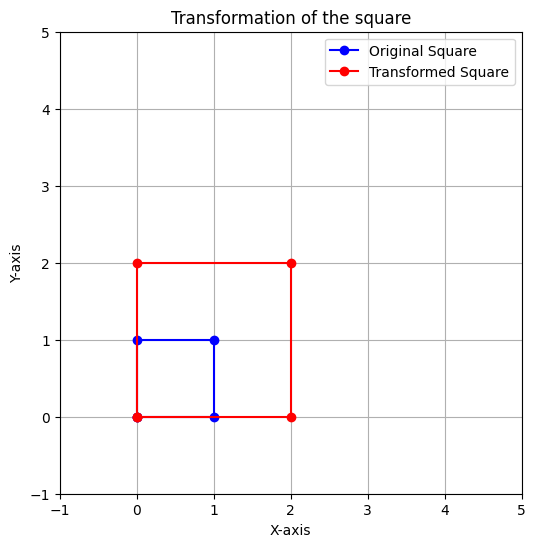

In [ ]:
# Translation d'1 unité d'abscisse et 2 unités d'ordonnée
homothety_matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1/2]
])

new_square = homothety_matrix @ square

plottransfo(square,new_square)

Cette même homothétie s'écrit aussi:

$$
\begin{pmatrix}
\sqrt{\lambda} & 0 & 0 \\
0 & \sqrt{\lambda} & 0 \\
0 & 0 & 1/\sqrt{\lambda}
\end{pmatrix}
$$

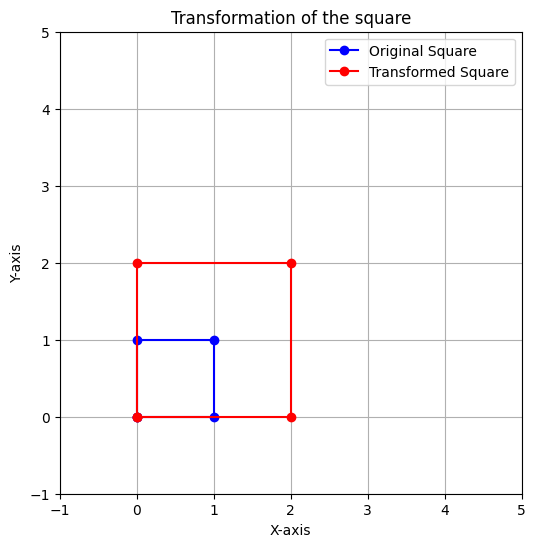

In [ ]:
# Translation d'1 unité d'abscisse et 2 unités d'ordonnée
homothety_matrix = np.array([
    [np.sqrt(2), 0, 0],
    [0, np.sqrt(2), 0],
    [0, 0, 1/np.sqrt(2)]
])

new_square = homothety_matrix @ square

plottransfo(square,new_square)

En fait, toutes les matrices:

$$
\begin{pmatrix}
u & 0 & 0 \\
0 & u & 0 \\
0 & 0 & u/\lambda
\end{pmatrix}
$$

avec $u$ $\in$ $\mathbb{R}-\{0\}$ représentent l'homothétie de facteur $\lambda$.

### Description mathématique de l'ensemble des similitudes du plan

Les similitudes du plan sont les composées successives de transformations euclidiennes et d'homothéties. On peut se limiter à des composées alternées, car la composée de deux homothéties est une homothétie et la composée de deux transformations euclidiennes est une transformation euclidienne.

Nous voulons établir que l'ensemble des similitudes du plan est décrit par $$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u/\lambda
\end{pmatrix}
\;\middle|\; u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0
\right\}$$

Grâce à la remarque ci-dessus, on veut montrer l'égalité ensembliste:

$$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u/\lambda
\end{pmatrix}
\;\middle|\; u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0
\right\}={\text{Ensemble des produits alternés de transformations euclidiennes et d'homothéties}}$$

#### Inclusion $\subset$

Soient $u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0$

In [15]:
from sympy import Matrix, symbols, simplify, cos, sin
u, Lambda, theta, t_x, t_y = symbols('u Lambda theta t_x t_y')
E = Matrix([[cos(theta), -sin(theta), t_x],
            [sin(theta), cos(theta), t_y],
            [0, 0, 1]])
H = Matrix([[u, 0, 0],
            [0, u, 0],
            [0, 0, u/Lambda]])
expression1 = H * E

HE = simplify(expression1)


In [16]:
HE

Matrix([
[u*cos(theta), -u*sin(theta),    t_x*u],
[u*sin(theta),  u*cos(theta),    t_y*u],
[           0,             0, u/Lambda]])

Donc tout élément de l'ensemble matriciel s'écrit sous la forme $HE$, où $H$ est une homothétie et $E$ une transformation euclidienne, ce qui montre la première inclusion.

#### Inclusion $\supset$

Les homothéties et les transformations euclidiennes sont clairement des similitudes.

Tout produit HE et EH est dans l'ensemble de gauche car:

In [17]:
from sympy import Matrix, symbols, simplify, cos, sin
u_1, u_2, theta, t_x, t_y = symbols('u_1 u_2 theta t_x t_y')
E = Matrix([[u_1*cos(theta), -u_1*sin(theta), u_1*t_x],
            [u_1*sin(theta), u_1*cos(theta), u_1*t_y],
            [0, 0, u_1]])
H = Matrix([[u_2, 0, 0],
            [0, u_2, 0],
            [0, 0, u_2]])
expression1 = H * E
expression2 = E * H

HE = simplify(expression1)
EH = simplify(expression2)

In [18]:
HE

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), t_x*u_1*u_2],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), t_y*u_1*u_2],
[                 0,                   0,     u_1*u_2]])

In [19]:
EH

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta), t_x*u_1*u_2],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta), t_y*u_1*u_2],
[                 0,                   0,     u_1*u_2]])

Enfin, l'ensemble $$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u/\lambda
\end{pmatrix}
\;\middle|\; u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0
\right\}$$ est stable par multiplication par une transformation euclidienne ou une homothétie à gauche:

In [21]:
from sympy import Matrix, symbols, simplify, cos, sin
u_1, u_2, Lambda, theta, x_1, y_1, x_2, y_2 = symbols('u_1 u_2 Lambda theta x_1 y_1 x_2 y_2')
mat = Matrix([[u_1*cos(theta), -u_1*sin(theta), u_1*x_1],
            [u_1*sin(theta), u_1*cos(theta), u_1*y_1],
            [0, 0, u_1/Lambda]])
H = Matrix([[u_2, 0, 0],
            [0, u_2, 0],
            [0, 0, u_2]])
E = Matrix([[u_2*cos(theta), -u_2*sin(theta), u_2*x_2],
            [u_2*sin(theta), u_2*cos(theta), u_2*y_2],
            [0, 0, u_2]])
expression1 = H * mat
expression2 = E * mat

Hmat = simplify(expression1)
Emat = simplify(expression2)

In [22]:
Hmat

Matrix([
[u_1*u_2*cos(theta), -u_1*u_2*sin(theta),    u_1*u_2*x_1],
[u_1*u_2*sin(theta),  u_1*u_2*cos(theta),    u_1*u_2*y_1],
[                 0,                   0, u_1*u_2/Lambda]])

In [23]:
Emat

Matrix([
[u_1*u_2*cos(2*theta), -u_1*u_2*sin(2*theta), u_1*u_2*(Lambda*(x_1*cos(theta) - y_1*sin(theta)) + x_2)/Lambda],
[u_1*u_2*sin(2*theta),  u_1*u_2*cos(2*theta), u_1*u_2*(Lambda*(x_1*sin(theta) + y_1*cos(theta)) + y_2)/Lambda],
[                   0,                     0,                                                  u_1*u_2/Lambda]])

Ce qui montre la deuxième inclusion.

**Conclusion:** les similitudes sont décrites par l'ensemble $$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x \\
u\sin\theta & u\cos\theta & ut_y \\
0 & 0 & u/\lambda
\end{pmatrix}
\;\middle|\; u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0
\right\}$$
Cela correspond à toutes les composées dans l'ordre qu'on veut (l'ordre important, car pas de commutativité) de rotations, de translations et d'homothéties. Mais **attention**, avec l'écriture ci-dessus, la translation "globale" de ($t_x$,$t_y$) est appliquée AVANT d'appliquer l'homothétie (ce qui se traduit par une translation ($\lambda t_x$,$\lambda t_y$) à la fin). De manière équivalente, l'ensemble des similitudes peut d'écrire comme ci-dessous, où cette fois-ci la translation "globale" de ($t_x$,$t_y$) est appliquée APRES application de l'homothétie :

$$\left\{
\begin{pmatrix}
u\cos\theta & -u\sin\theta & ut_x/\lambda \\
u\sin\theta & u\cos\theta & ut_y/\lambda \\
0 & 0 & u/\lambda
\end{pmatrix}
\;\middle|\; u, \lambda, \theta, t_x, t_y \in \mathbb{R}, u \neq 0, \lambda \neq 0
\right\}$$

**Les similitudes conservent les angles et les ratios de longueurs (mais pas les longueurs évidemment).**

## Transformation affine

$$\left\{
\begin{pmatrix}
a & b & c \\
d & e & f \\
0 & 0 & i
\end{pmatrix}
\;\middle|\; a,b,c,d,e,f,i \in \mathbb{R}, i \neq 0
\right\}$$

**Les transformations affines conservent le parallélisme.**

## Homographie

$$\left\{
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{pmatrix}
\;\middle|\; a,b,c,d,e,f,g,h,i \in \mathbb{R}, i \neq 0
\right\}$$

**Les homographies conservent l'alignement : 3 points alignés le restent après homographie.**